# L-BFGS and Vector-free L-BFGS demonstration

In [1]:
import numpy as np
import lbfgs
import utils
from scipy.optimize import fmin_l_bfgs_b
from scipy.optimize import check_grad
import matplotlib.pyplot as plt

## Check of the convergence 

We check that the algorithms implemented for L-BFGS and Vector-free L-BFGS (VL-BFGS) converges correctly by comparing them to the corresponding algorithm of scipy.

#### Simulate data

In [30]:
# Parameters
d = 50
n = 1000
idx = np.arange(d)
lbda = 1. / n ** (0.5)

# Ground truth coefficients of the model
coefs = (-1) ** idx * np.exp(-idx / 10.)

In [31]:
_A, _b = utils.simulate_data(coefs, n, std=1., corr=0.8, log_reg=False)

#### Check of the gradient computation

In [32]:
check_grad(utils.loss_logreg, utils.grad_logreg, np.random.randn(d), _A, _b, lbda)

2.0562918090510837e-07

#### Optimization for linear regression

In [33]:
f = utils.loss_linreg
f_grad = utils.grad_linreg

x_init = np.zeros(d)

In [35]:
print("---- Scipy ----")
t0 = time()
x_min_scipy, f_min_scipy, _ = fmin_l_bfgs_b(f, x_init, f_grad, args=(_A, _b, lbda), pgtol=1e-30, factr=1e-30, maxiter=100)
print("Computation time: ", time()-t0)

print("\n---- L-BFGS ----")
lbfgs_optimizer = lbfgs.LBFGS(f, f_grad, m=10, vector_free=False, max_iter=100)
x_min_lbfgs, f_min_lbfgs, time_lbfgs  = lbfgs_optimizer.fit(x_init, _A, _b, lbda)
print("Computation time: ", time_lbfgs)

print("\n---- VL-BFGS ----")
vlbfgs_optimizer = lbfgs.LBFGS(f, f_grad, m=10, vector_free=True, max_iter=100)
x_min_vlbfgs, f_min_vlbfgs, time_vlbfgs = vlbfgs_optimizer.fit(x_init, _A, _b, lbda)
print("Computation time: ", time_vlbfgs)

---- Scipy ----
Computation time:  2.7006802558898926

---- L-BFGS ----
Computation time:  7.752120733261108

---- VL-BFGS ----
Computation time:  10.79254698753357


In [36]:
print("----- Results: -----")
print("Scipy minimum: ", round(f_min_scipy, 5))
print("L-BFGS minimum: ", round(f_min_lbfgs[-1], 5))
print("VL-BFGS minimum: ", round(f_min_vlbfgs[-1], 5))

----- Results: -----
Scipy minimum:  0.51506
L-BFGS minimum:  0.51506
VL-BFGS minimum:  0.51506


## Comparison of efficiency

In [10]:
# Parameters
d = 5000
n = 100000
idx = np.arange(d)
lbda = 1. / n ** (0.5)

# Ground truth coefficients of the model
coefs = (-1) ** idx * np.exp(-idx / 10.)

In [11]:
_A, _b = utils.simulate_data(coefs, n, std=1., corr=0.8, log_reg=False)

In [14]:
f = utils.loss_linreg
f_grad = utils.grad_linreg

x_init = np.zeros(d)

In [15]:
from time import time

In [17]:
print("---- Scipy ----")
t0 = time()
x_min_scipy, f_min_scipy, _ = fmin_l_bfgs_b(f, x_init, f_grad, args=(_A, _b, lbda), pgtol=1e-30, factr=1e-30, maxiter=100)
print("Computation time: ", time()-t0)

print("\n---- L-BFGS ----")
lbfgs_optimizer = lbfgs.LBFGS(f, f_grad, m=10, vector_free=False, max_iter=100)
x_min_lbfgs, f_min_lbfgs, time_lbfgs  = lbfgs_optimizer.fit(x_init, _A, _b, lbda)
print("Computation time: ", time_lbfgs)

print("\n---- VL-BFGS ----")
vlbfgs_optimizer = lbfgs.LBFGS(f, f_grad, m=10, vector_free=True, max_iter=100)
x_min_vlbfgs, f_min_vlbfgs, time_vlbfgs = vlbfgs_optimizer.fit(x_init, _A, _b, lbda)
print("Computation time: ", time_vlbfgs)

---- Scipy ----
Computation time:  275.35200548171997

---- L-BFGS ----
Computation time:  952.5421376228333

---- VL-BFGS ----
Computation time:  946.8009729385376


In [18]:
print("----- Results: -----")
print("Scipy minimum: ", round(f_min_scipy, 5))
print("L-BFGS minimum: ", round(f_min_lbfgs[-1], 5))
print("VL-BFGS minimum: ", round(f_min_vlbfgs[-1], 5))

----- Results: -----
Scipy minimum:  0.4875
L-BFGS minimum:  0.4875
VL-BFGS minimum:  0.4875


In [25]:
f_min = min(f_min_scipy, f_min_lbfgs[-1], f_min_vlbfgs[-1])

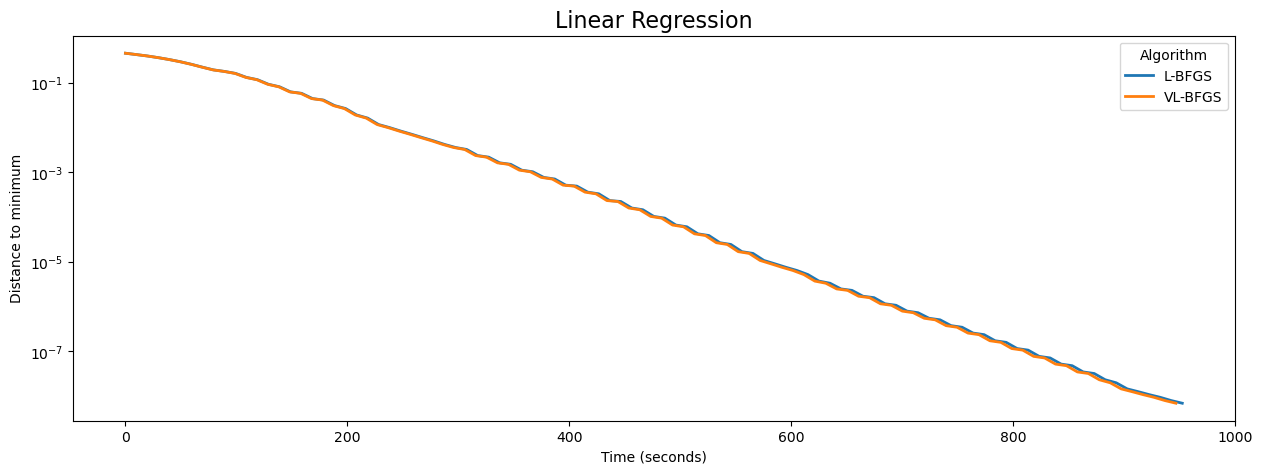

In [29]:
plt.figure(figsize=(15, 5))
plt.semilogy(np.linspace(0, time_lbfgs, len(f_min_lbfgs)), f_min_lbfgs - f_min, lw=2, label='L-BFGS')
plt.semilogy(np.linspace(0, time_vlbfgs, len(f_min_vlbfgs)), f_min_vlbfgs - f_min, lw=2, label='VL-BFGS')
plt.yscale('log')
plt.title("Linear Regression", fontsize=16)
plt.legend(title='Algorithm', loc='best')
plt.xlabel('Time (seconds)')
plt.ylabel('Distance to minimum')
plt.show()